# QUESTION 1

In [293]:
import numpy as np
from scipy import stats

# Given data (energy intake values in kJ)
data = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])

# Hypothesized population mean
mu = 7725

#  Calculate the sample mean
sample_mean = np.mean(data)

# Identifying the population mean (already given as mu = 7725)

#  Calculate the sample standard deviation and standard error of the mean (SEM)
sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
n = len(data)
SEM = sample_std / np.sqrt(n)

# alculate the t-statistic
t_statistic = (sample_mean - mu) / SEM

# Degrees of freedom
df = n - 1

# S Calculate the p-value (two-tailed test)
p_value = 2 * stats.t.sf(np.abs(t_statistic), df)

# Output the values
print(f"Sample Mean: {sample_mean:.2f} kJ")
print(f"Sample Standard Deviation: {sample_std:.2f} kJ")
print(f"Standard Error of the Mean (SEM): {SEM:.2f} kJ")
print(f"t-statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {df}")
print(f"p-value: {p_value:.4f}")

# Step 8: Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: The mean energy intake significantly deviates from 7725 kJ.")
else:
    print("Fail to reject the null hypothesis: The mean energy intake does not significantly deviate from 7725 kJ.")


Sample Mean: 6753.64 kJ
Sample Standard Deviation: 1142.12 kJ
Standard Error of the Mean (SEM): 344.36 kJ
t-statistic: -2.82
Degrees of Freedom: 10
p-value: 0.0181
Reject the null hypothesis: The mean energy intake significantly deviates from 7725 kJ.


# QUESTION  2 

In [294]:
import numpy as np
from scipy import stats

# Sample data
n1 = 42  # Sample size for Ireland
M1 = 74  # Mean for Ireland
SD1 = 7.4  # Standard deviation for Ireland

n2 = 61  # Sample size for Elsewhere
M2 = 57  # Mean for Elsewhere
SD2 = 7.1  # Standard deviation for Elsewhere

# Step 1: Calculate Standard Error (SE)
SE = np.sqrt((SD1**2 / n1) + (SD2**2 / n2))

# Step 2: Calculate t-statistic
t_statistic = (M1 - M2) / SE

# Step 3: Calculate degrees of freedom
df = n1 + n2 - 2

# Step 4: Calculate p-value (one-tailed)
p_value = stats.t.sf(t_statistic, df)  # one-tailed

# p_value_two_tailed = stats.t.sf(np.abs(t_statistic), df) * 2  # two-tailed

# Output results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"P-Value: {p_value}")


T-Statistic: 11.6477
Degrees of Freedom: 101
P-Value: 1.095517028264447e-20


# QUESTION 3

1. Install xlrd

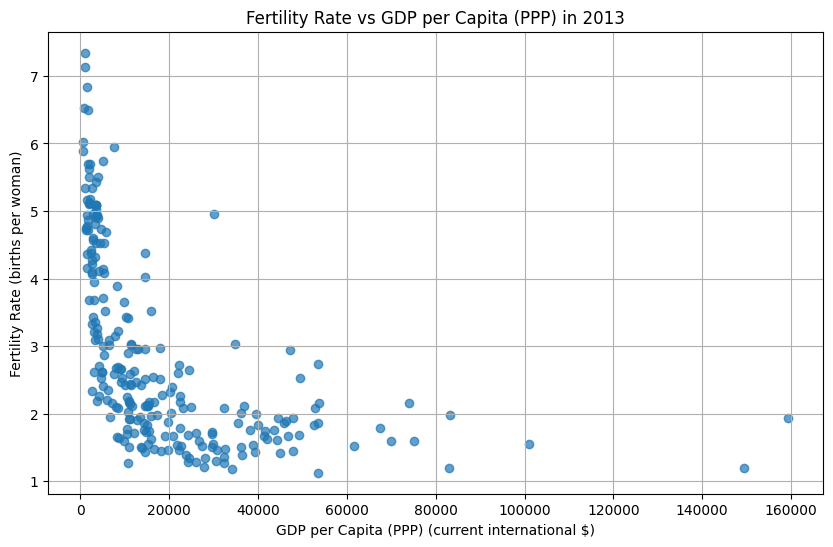

Correlation coefficient: -0.5171011715833227


In [316]:
import pandas as pd
import matplotlib.pyplot as plt
# Loading datasets
fertility_rate_data = pd.read_excel("API_SP.DYN.TFRT.IN_DS2_en_excel_v2_946.xls", sheet_name="Data", skiprows=3)
gdp_per_capita_data = pd.read_excel("API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_31824.xls", sheet_name="Data", skiprows=3)

# Filter the data for the year 2013
fertility_2013 = fertility_rate_data[['Country Name', '2013']]
fertility_2013.columns = ['Country Name', 'Fertility Rate']

gdp_2013 = gdp_per_capita_data[['Country Name', '2013']]
gdp_2013.columns = ['Country Name', 'GDP per Capita PPP']

# Merge the datasets on 'Country Name'
merged_data = pd.merge(fertility_2013, gdp_2013, on='Country Name')

# Drop rows with missing values
merged_data.dropna(inplace=True)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gdp_2013['GDP per Capita PPP'], fertility_2013['Fertility Rate'], alpha=0.7)
plt.title('Fertility Rate vs GDP per Capita (PPP) in 2013')
plt.xlabel('GDP per Capita (PPP) (current international $)')
plt.ylabel('Fertility Rate (births per woman)')
plt.grid(True)

plt.show()

# Calculate the correlation coefficient
correlation = merged_data['Fertility Rate'].corr(merged_data['GDP per Capita PPP'])
print(f'Correlation coefficient: {correlation}')




# QUESTION 4

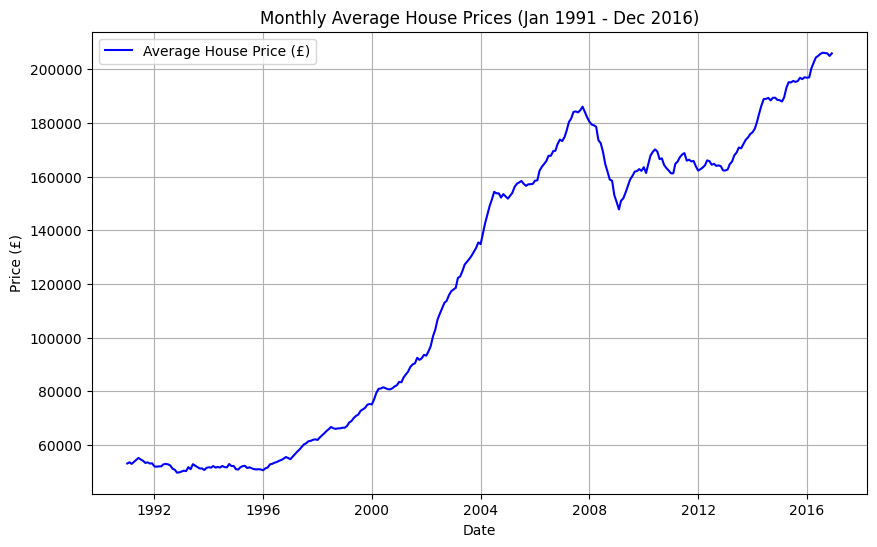

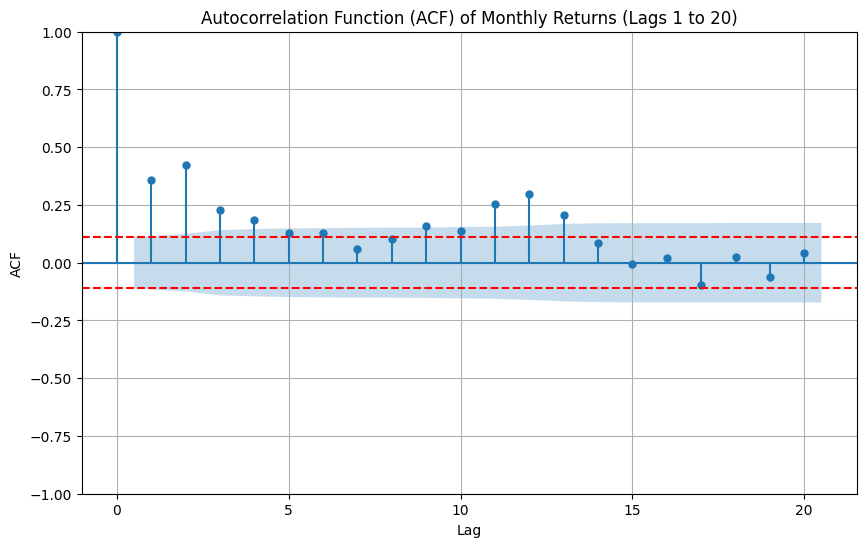

Annualized Return: 5.35423853535919%


In [296]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats

# Load the data
df = pd.read_excel("Monthly Average House Price.xls", sheet_name="Monthly")

# Convert 'Unnamed: 0' to datetime and set it as index
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Unnamed: 0', inplace=True)

# Restrict data to the period from Jan 1991 to Dec 2016
df = df.loc['1991-01-01':'2016-12-31']

# Extract 'Average House Price' for analysis
house_prices = df['Average House Price']


# Plot the time series of house prices (Jan 1991 - Dec 2016)
plt.figure(figsize=(10, 6))  # Larger figsize and increased DPI
plt.plot(house_prices, label='Average House Price (£)', color='blue')
plt.title('Monthly Average House Prices (Jan 1991 - Dec 2016)')
plt.xlabel('Date')
plt.ylabel('Price (£)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the monthly returns r(t) = [p(t) / p(t-1)] - 1
monthly_returns = house_prices.pct_change().dropna()

# Create a new figure for the ACF plot and manually set size
fig, ax = plt.subplots(figsize=(10, 6))  

# Plot the ACF of the monthly returns for lags 1 to 20
plot_acf(monthly_returns, lags=20, ax=ax)  # Pass the ax to plot_acf
ax.set_title('Autocorrelation Function (ACF) of Monthly Returns (Lags 1 to 20)')
ax.set_xlabel('Lag')
ax.set_ylabel('ACF')

# Calculate the critical value for p < 0.05 (two-tailed)
n = len(monthly_returns)
conf_interval = 1.96 / np.sqrt(n)  # Approx. confidence interval for 95% significance

# Add horizontal lines for statistical significance at p < 0.05
ax.axhline(y=conf_interval, linestyle='--', color='red', label='95% Confidence Interval')
ax.axhline(y=-conf_interval, linestyle='--', color='red')
ax.grid(True)

plt.show()

# Calculate the annualized return over the period
total_return = (house_prices.iloc[-1] / house_prices.iloc[0]) - 1
annualized_return = (1 + total_return) ** (1 / (len(house_prices) / 12)) - 1
annualized_return_percentage = annualized_return * 100

print(f"Annualized Return: {annualized_return_percentage}%")




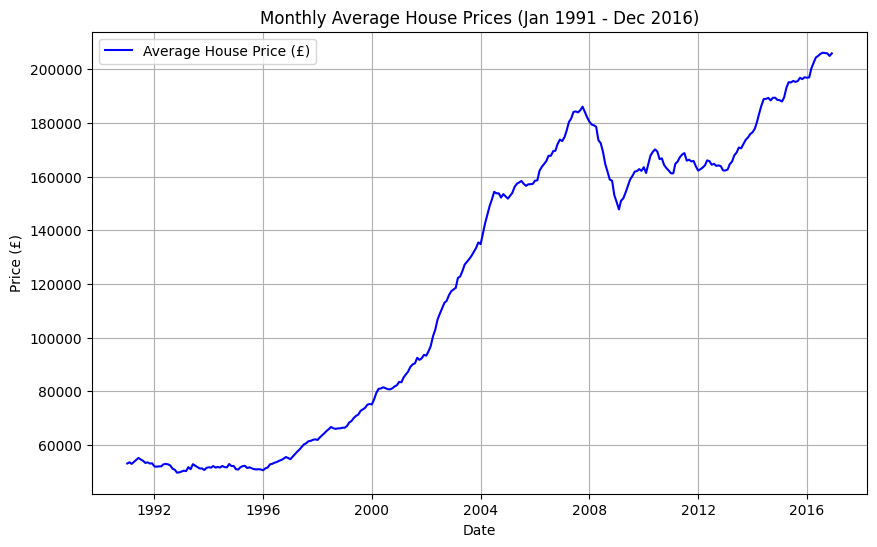

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_10512\3978319530.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices_filtered['Monthly Return'] = house_prices_filtered['Average House Price'].pct_change()


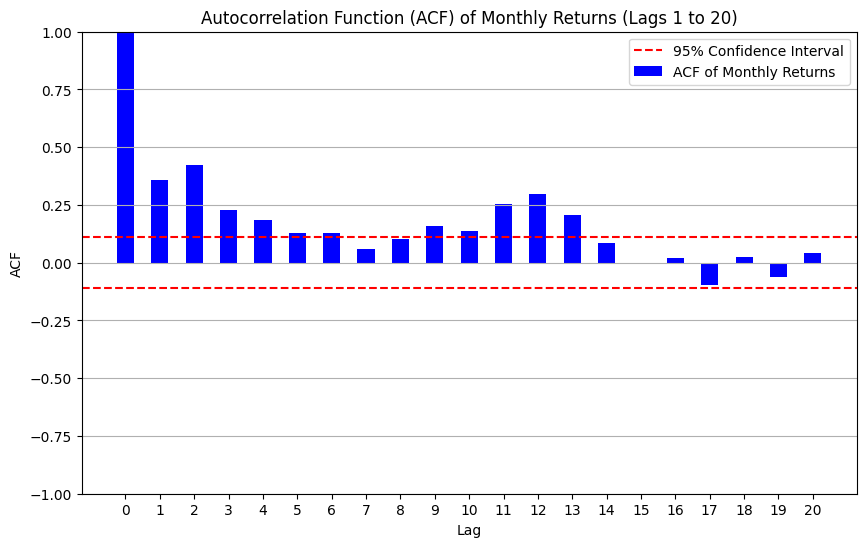

25.916666666666668
Annualized Return: 5.34%


In [311]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf


house_prices = pd.read_excel('Monthly Average House Price.xls') 

#  filter average house price
house_prices = house_prices[['Unnamed: 0', 'Average House Price']]
house_prices_filtered = house_prices[(house_prices['Unnamed: 0'] >= '1991-01-01') & (house_prices['Unnamed: 0'] <= '2016-12-31')]

# Plot the time series of house prices (Jan 1991 - Dec 2016)
plt.figure(figsize=(10, 6))  # Larger figsize and increased DPI
plt.plot(house_prices_filtered['Unnamed: 0'],house_prices_filtered['Average House Price'], label='Average House Price (£)', color='blue')
plt.title('Monthly Average House Prices (Jan 1991 - Dec 2016)')
plt.xlabel('Date')
plt.ylabel('Price (£)')
plt.grid(True)
plt.legend()
plt.show()

# average house price return
house_prices_filtered['Monthly Return'] = house_prices_filtered['Average House Price'].pct_change()
house_prices_filtered = house_prices_filtered.dropna()


# Calculate ACF values for lags 1 to 20
lags = 20
acf_values = acf(house_prices_filtered['Monthly Return'], nlags=lags)

# Create a new figure for the ACF plot and manually set size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ACF values as a bar chart and add a label for the legend
ax.bar(range(len(acf_values)), acf_values, color='blue', width=0.5, label='ACF of Monthly Returns')

# Set title and labels
ax.set_title('Autocorrelation Function (ACF) of Monthly Returns (Lags 1 to 20)')
ax.set_xlabel('Lag')
ax.set_ylabel('ACF')

# Calculate the critical value for p < 0.05 (two-tailed)
n = len(house_prices_filtered['Monthly Return'])
conf_interval = 1.96 / np.sqrt(n)  # Approx. confidence interval for 95% significance

# Add horizontal lines for statistical significance at p < 0.05
ax.axhline(y=conf_interval, linestyle='--', color='red', label='95% Confidence Interval')
ax.axhline(y=-conf_interval, linestyle='--', color='red')

# Set dynamic x-ticks and limits
ax.set_xticks(range(len(acf_values)))  # Set x-ticks dynamically based on acf_values length

# Set dynamic y-ticks and limits
y_min, y_max = -1, 1  # Set the limits dynamically
ax.set_ylim(y_min, y_max)  # Set y-limits
ax.grid(axis='y')

# Add the legend (now including both ACF bars and the confidence interval)
plt.legend()

# Display the plot
plt.show()


# Calculate the annualized return over the period
total_return = (house_prices_filtered['Average House Price'].iloc[-1] / house_prices_filtered['Average House Price'].iloc[0]) 
annualized_return = ( total_return) ** (1 / (len(house_prices_filtered) / 12)) - 1
annualized_return_percentage = annualized_return * 100
print(len(house_prices_filtered)/12)

print(f"Annualized Return: {annualized_return_percentage:.2f}%")


# QUESTION 5

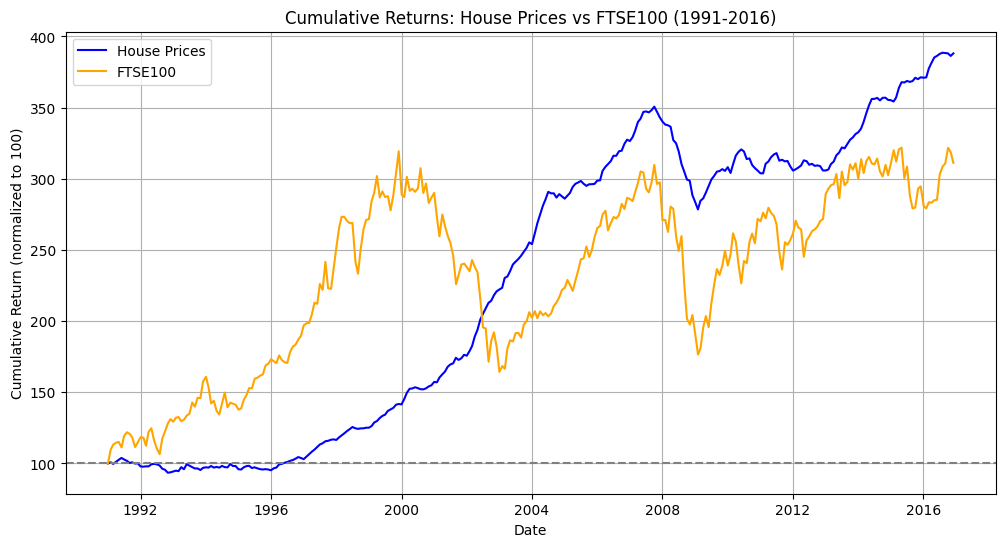

Average Annualized Return for FTSE100: 4.48%
It would have been better to invest in UK houses.


In [298]:
import pandas as pd 
import matplotlib.pyplot as plt

# Load house prices data 
house_prices = pd.read_excel('Monthly Average House Price.xls') 
house_prices['Unnamed: 0'] = pd.to_datetime(house_prices['Unnamed: 0'])
house_prices.set_index('Unnamed: 0', inplace=True)

# Filter house prices for the date range and create a copy to avoid SettingWithCopyWarning
house_prices_filtered = house_prices.loc['1991-01-01':'2016-12-31'].copy()


# Calculate cumulative returns for house prices
house_prices_filtered['Cumulative Return'] = (house_prices_filtered['Average House Price'] / house_prices_filtered['Average House Price'].iloc[0]) * 100

# Load FTSE100 data from CSV
ftse100 = pd.read_csv('FTSE100.csv')  
ftse100['Date'] = pd.to_datetime(ftse100['Date'])
ftse100.set_index('Date', inplace=True)

# Ensure the index is sorted
ftse100.sort_index(inplace=True)

# Filter FTSE100 for the same date range and create a copy
ftse100_filtered = ftse100.loc['1991-01-01':'2016-12-31'].copy()

# Calculate cumulative returns for FTSE100
ftse100_filtered['Cumulative Return'] = (ftse100_filtered['Adj Close'] / ftse100_filtered['Adj Close'].iloc[0]) * 100
# print(ftse100_filtered['Cumulative Return'].isnull().values.any())
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(house_prices_filtered.index, house_prices_filtered['Cumulative Return'], label='House Prices', color='blue')
plt.plot(ftse100_filtered.index, ftse100_filtered['Cumulative Return'], label='FTSE100', color='orange')
plt.title('Cumulative Returns: House Prices vs FTSE100 (1991-2016)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (normalized to 100)')
plt.axhline(y=100, color='gray', linestyle='--')  # Line for reference
plt.legend()
plt.grid()
plt.show()

# Calculate average annualized return for FTSE100
years = (ftse100_filtered.index[-1] - ftse100_filtered.index[0]).days / 365.25
average_annualized_return = (ftse100_filtered['Adj Close'].iloc[-1] / ftse100_filtered['Adj Close'].iloc[0]) ** (1/years) - 1

# Display the average annualized return
print(f'Average Annualized Return for FTSE100: {average_annualized_return:.2%}')

# Conclusion
if average_annualized_return > (house_prices_filtered['Cumulative Return'].iloc[-1] / 100 - 1) / years:
    print("It would have been better to invest in the UK stock market (FTSE100).")
else:
    print("It would have been better to invest in UK houses.")






 # QUESTION 5.1

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_10512\3690547980.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices_filtered['Monthly Return'] = house_prices_filtered['Average House Price'].pct_change()


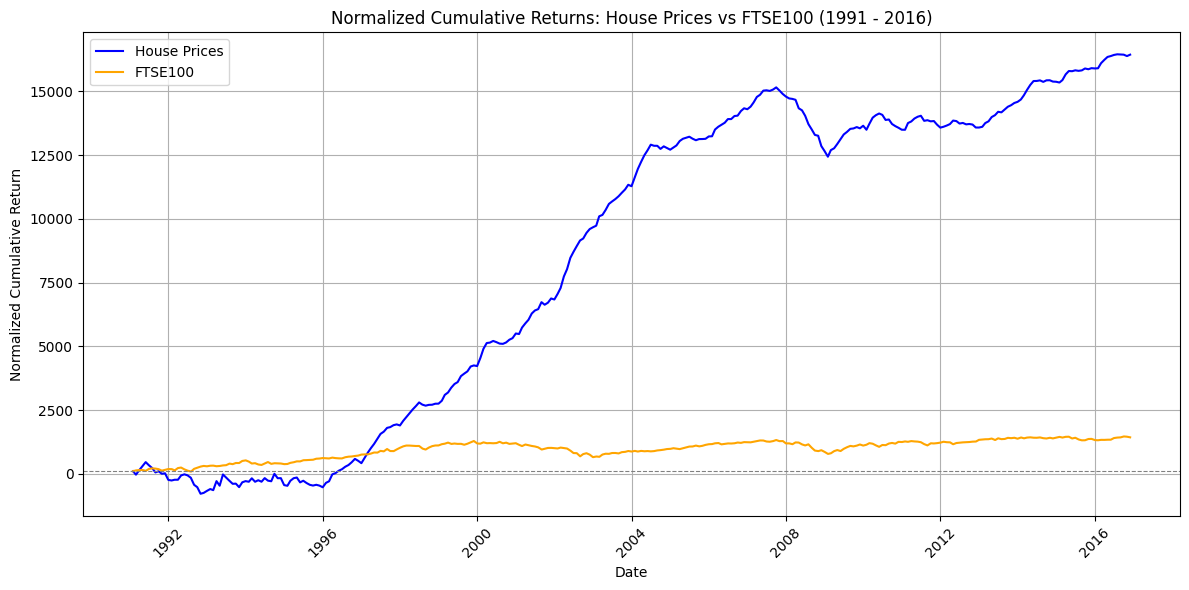

4.104498464342843


In [310]:
import pandas as pd
import matplotlib.pyplot as plt

house_prices = pd.read_excel('Monthly Average House Price.xls') 
# house_prices['Unnamed: 0'] = pd.to_datetime(house_prices['Unnamed: 0'])
# house_prices.set_index('Unnamed: 0', inplace=True)

#  filter average house price
house_prices = house_prices[['Unnamed: 0', 'Average House Price']]
house_prices_filtered = house_prices[(house_prices['Unnamed: 0'] >= '1991-01-01') & (house_prices['Unnamed: 0'] <= '2016-12-31')]

# average house price return
house_prices_filtered['Monthly Return'] = house_prices_filtered['Average House Price'].pct_change()
house_prices_filtered = house_prices_filtered.dropna()


# house prices cumulative sum of returns
house_prices_filtered['Cumulative Return'] = house_prices_filtered['Monthly Return'].cumsum()


# Normalize cumulative returns to start from 100
house_prices_filtered['Normalized Cumulative Return'] = (house_prices_filtered['Cumulative Return'] / house_prices_filtered['Cumulative Return'].iloc[0]) * 100

# Load FTSE100 data from CSV
ftse100 = pd.read_csv('FTSE100.csv')  
ftse100['Date'] = pd.to_datetime(ftse100['Date'])

# filter adjusted close
filtered_ftse100 = ftse100[['Date', 'Adj Close']]
filtered_ftse100 = filtered_ftse100[(filtered_ftse100['Date'] >= '1991-01-01') & (filtered_ftse100['Date'] <= '2016-12-31')]

# filtered_ftse100 = filtered_ftse100.set_index('Date', inplace=True)
filtered_ftse100 = filtered_ftse100.sort_values(by='Date')

# Calculate monthly returns for FTSE100
filtered_ftse100['Monthly Return'] = filtered_ftse100['Adj Close'].pct_change()

filtered_ftse100 = filtered_ftse100.dropna()

# ftse100 cumulative sum of returns
filtered_ftse100['Cumulative Return'] = filtered_ftse100['Monthly Return'].cumsum()


# Normalize cumulative returns to start from 100
filtered_ftse100['Normalized Cumulative Return'] = (filtered_ftse100['Cumulative Return'] / filtered_ftse100['Cumulative Return'].iloc[0]) * 100




# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(house_prices_filtered['Unnamed: 0'], house_prices_filtered['Normalized Cumulative Return'], label='House Prices', color='blue')
plt.plot(filtered_ftse100['Date'], filtered_ftse100['Normalized Cumulative Return'], label='FTSE100', color='orange')

# Adding titles and labels
plt.title('Normalized Cumulative Returns: House Prices vs FTSE100 (1991 - 2016)')
plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Return')
plt.axhline(100, color='grey', linestyle='--', linewidth=0.8)  # Horizontal line at 100
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()


# Calculate average annualized return for FTSE100

years = (len(filtered_ftse100)/12)
average_annualized_return = (filtered_ftse100['Adj Close'].iloc[-1] / filtered_ftse100['Adj Close'].iloc[0]) ** (1/years) - 1
# Display the average annualized return
print(average_annualized_return*100)



